In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [2]:
run_path = '../'
test_name = 'Wave_scheduled'
test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

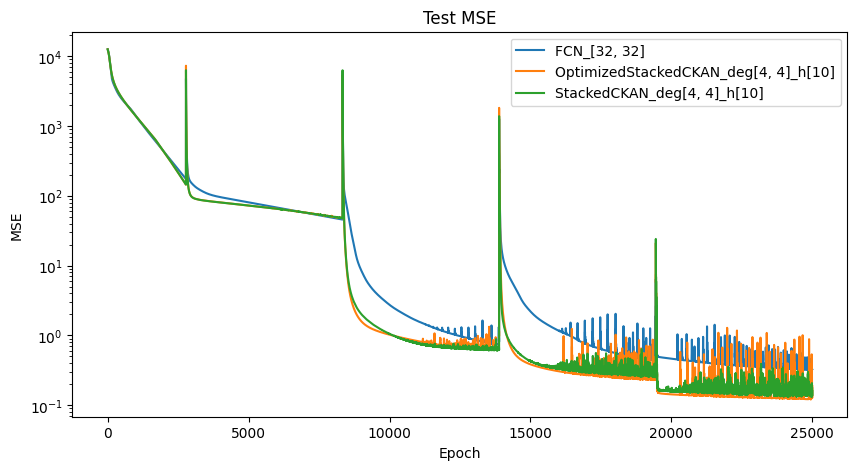

In [8]:
analyser.plot_mses(filter=lambda x: 'FCN_[32, 32]' in x or '_h[10]' in x)

<Figure size 700x700 with 0 Axes>

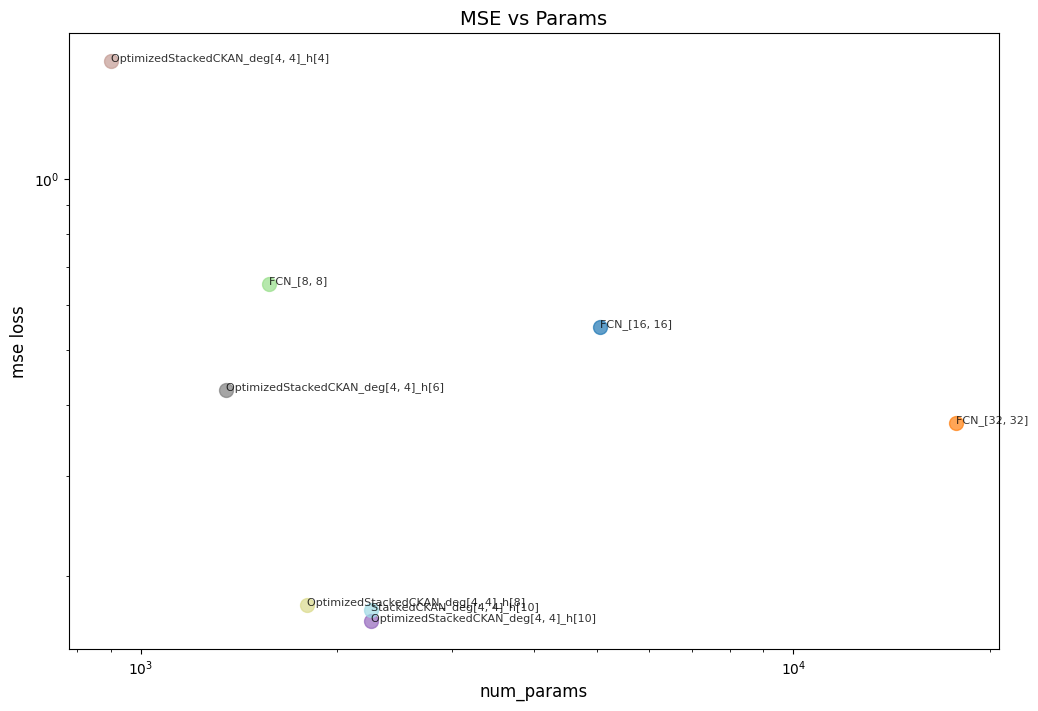

In [4]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

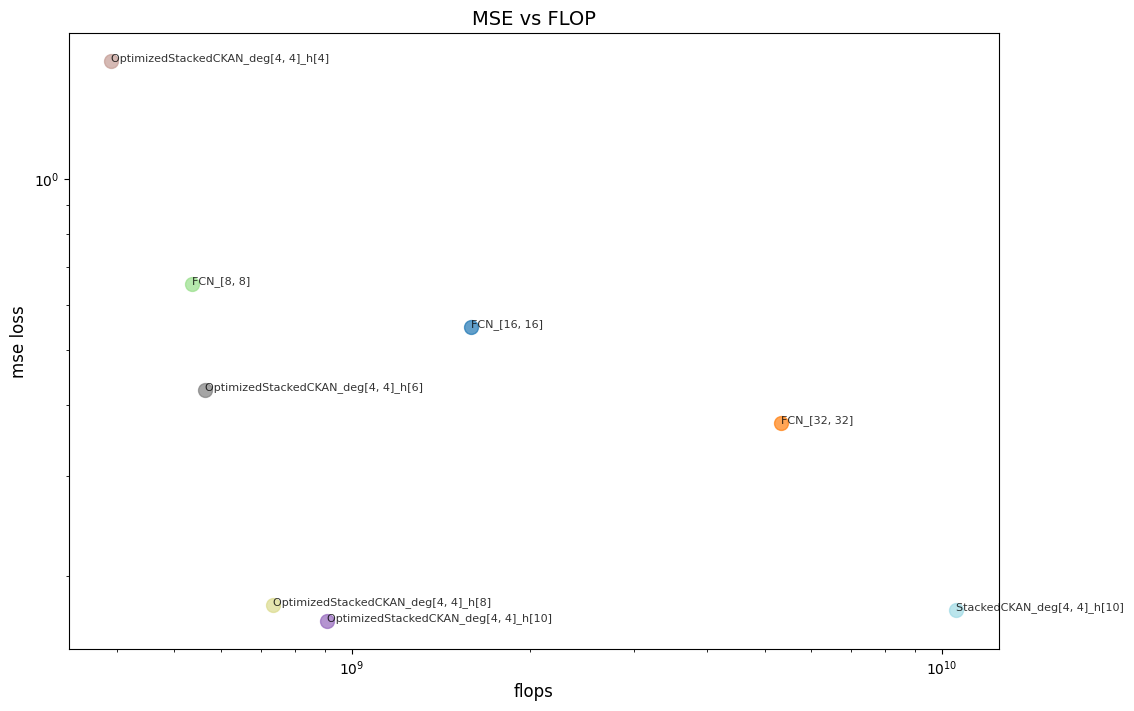

In [5]:
analyser.plot_mse_over_flops()

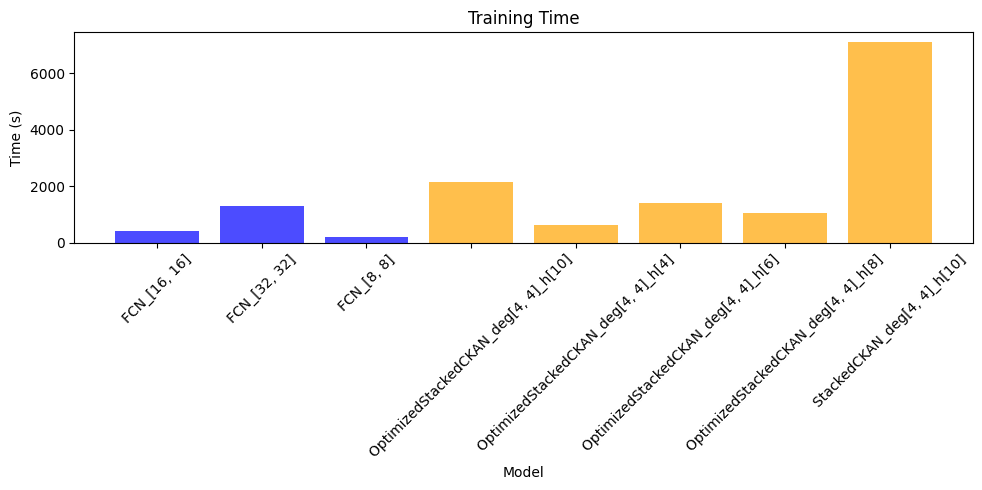

In [6]:
analyser.plot_training_times(filter=lambda x: 'Stacked' in x or 'FCN' in x)

<Figure size 700x700 with 0 Axes>

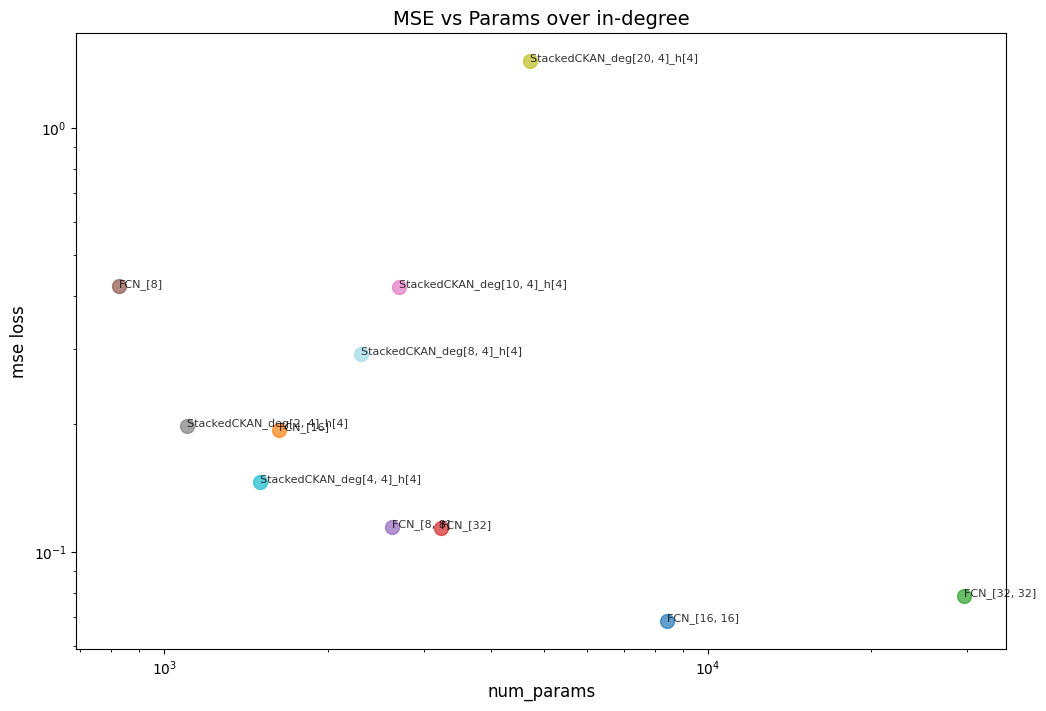

In [33]:
analyser.plot_mse_over_params(filter=lambda x: 'StackedCKAN_deg[' in x and ' 4]_h[4]' in x or 'FCN' in x, title='MSE vs Params over in-degree')

<Figure size 700x700 with 0 Axes>

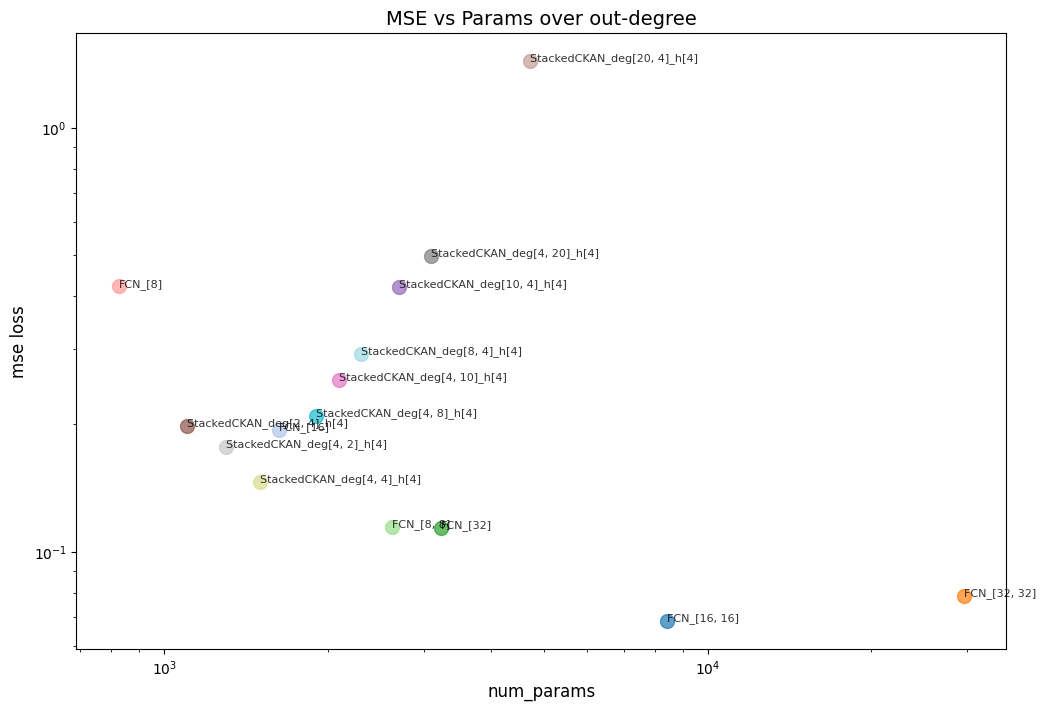

In [34]:
analyser.plot_mse_over_params(filter=lambda x: 'StackedCKAN_deg[' in x and ']_h[4]' in x or 'FCN' in x, title='MSE vs Params over out-degree')

<Figure size 700x700 with 0 Axes>

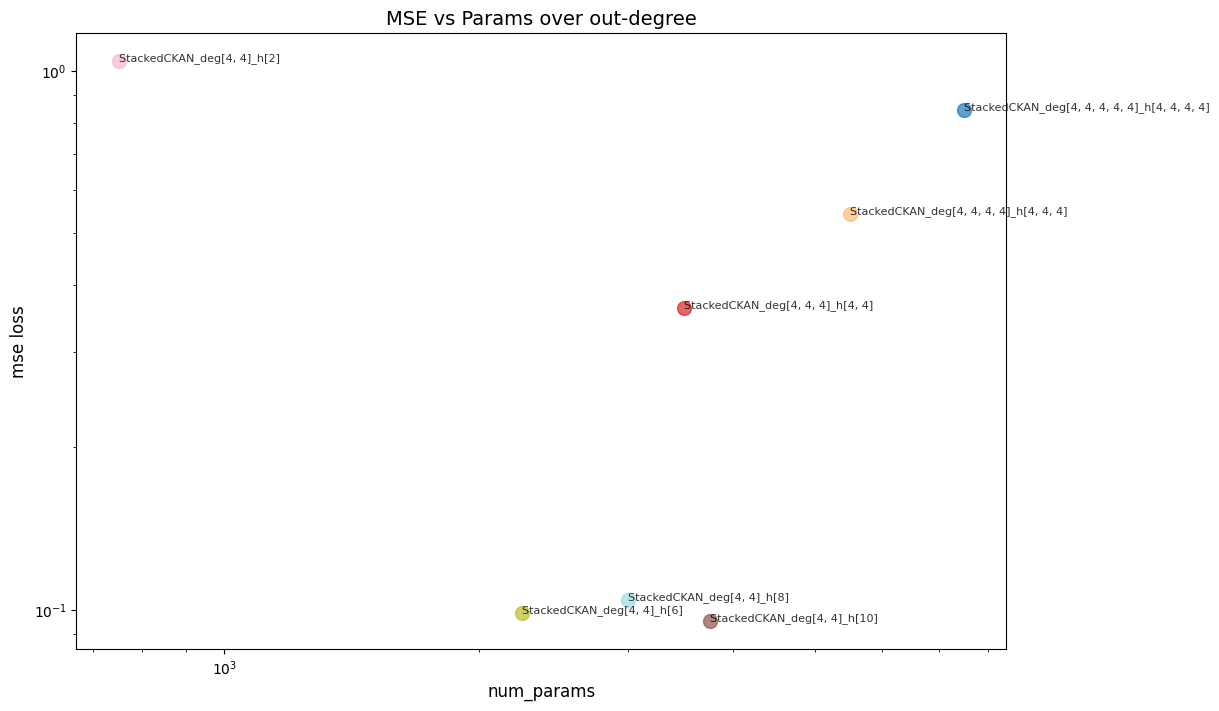

In [32]:
analyser.plot_mse_over_params(filter=lambda x: 'StackedCKAN_deg[4, ' in x and ']_h[4]' not in x, title='MSE vs Params over out-degree')